# Section 2.1.4: Bayesian Linear Regression
## by Telmo Cunha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(15)

## Data generation $\{(x_i,t_i)\}_{i=1}^N$

In [2]:
N=50

# Uniform distribution over [-1,1]
x_data=np.random.uniform(low=-1.0, high=1.0, size=N)

### Underlying function: $f(x)=-0.3+0.5x$

In [3]:
def f(x):
    return -0.3+0.5*x

In [4]:
def h(x,w0,w1):
    return w0+w1*x

#### Random noise generation: $\epsilon\sim N(0,0.2)$

In [5]:
epsilon=np.random.normal(loc=0.0, scale=0.2, size=N)

#### Target values: $t(x)=f(x)+\epsilon$

In [6]:
t_data=f(x_data)+epsilon

## Known quantities

In [7]:
# covariance factor of the Gaussian prior in w
alpha=2.0

# mean of the Gaussian prior in w
mu = np.array([0., 0.])

# covariance matrix of the Gaussian prior in w
Sigma = (1.0/alpha)*np.eye(2)

# covariance of the likelihood function
beta=25
beta_inv=1/beta

## Step 0 -  No datapoints received

#### Prior over w: $p(w|\alpha)=\mathcal{N}(w|0,\alpha^{-1}I)$

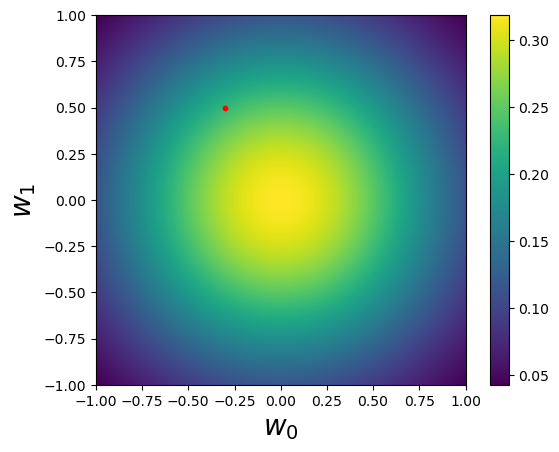

In [8]:
prior0 = multivariate_normal(mean=mu, cov=Sigma)

# generating a grid
xlim = (-1, 1)
ylim = (-1, 1)
xres = 200
yres = 200
x = np.linspace(xlim[0], xlim[1], xres)
y = np.linspace(ylim[0], ylim[1], yres)
xx, yy = np.meshgrid(x,y)
xxyy = np.c_[xx.ravel(), yy.ravel()]

# evaluating p1 on the grid
zz = prior0.pdf(xxyy)

# plot
prior = zz.reshape((xres,yres))
plt.imshow(prior,extent=[-1,1,-1,1])
plt.colorbar()
plt.xlabel('$w_0$', fontsize=20)
plt.ylabel('$w_1$', fontsize=20)

plt.scatter(-0.3,0.5,color='r',s=10)
plt.show()

#### Sampling 6 predictors y(x,w) by drawing from the dstribution above

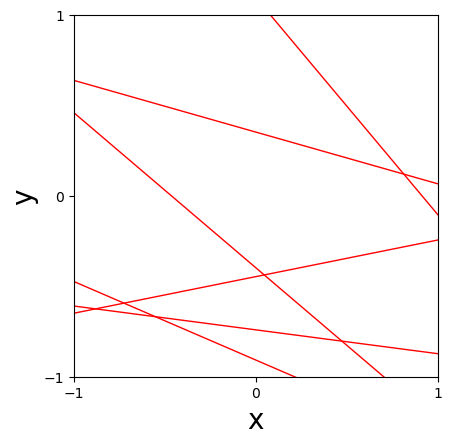

In [9]:
# m: number of lines sampled
m=6

# parameters of each sample
w_sample=np.random.multivariate_normal(mu, Sigma, size=m)

x_coord = np.linspace(-1, 1, N)

# plot
fig, ax = plt.subplots()
fig.set_size_inches(4.7, 4.7, forward=True)

ax.set(xlim=(-1, 1), xticks=np.arange(-1, 1.1,1),
       ylim=(-1, 1), yticks=np.arange(-1, 1.1,1))

ax.set_xlabel('x',fontsize=20)  # Add an x-label to the axes.
ax.set_ylabel('y',fontsize=20)  # Add a y-label to the axes.
x_coord = np.linspace(-1, 1, 200)

for j in range(m):
    
    y_coord = h(x_coord,w_sample[j][0],w_sample[j][1])
    ax.plot(x_coord, y_coord, linewidth=1.0, color="red",label="f: Underlying function")

plt.show()

#### Likelihood function

In [10]:
def likelihood_function(w0,w1):
    
    constant=(np.sqrt(beta)/np.sqrt(2*np.pi))
    l=constant*np.exp(-(beta/2)*(t_data[datapoint_index]-h(x_data[datapoint_index],w0,w1))**2)
        
    return l

## Step 1: First datapoint received

In [11]:
datapoint_index=0

#### Likelihood Plot

Datapoint: ( 0.6976353945371574 , 0.1694547849764662 )


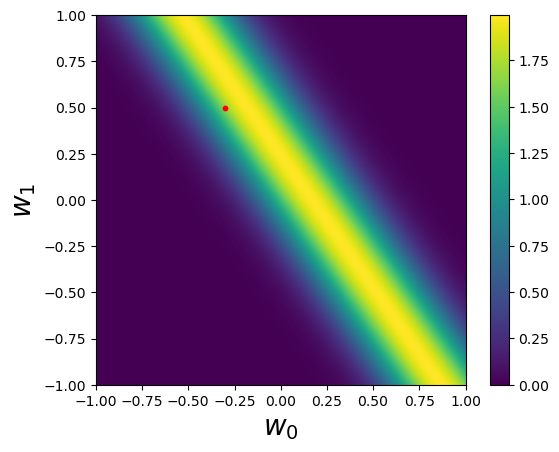

In [12]:
zz=np.zeros(len(xxyy))

for i in range(len(xxyy)):
    zz[i]=likelihood_function(xxyy[i,0],xxyy[i,1])
    
likelihood1 = zz.reshape((xres,yres))

print("Datapoint: (",x_data[datapoint_index],",",t_data[datapoint_index],")")

plt.imshow(likelihood1,extent=[-1,1,-1,1],origin="lower")
plt.colorbar()
plt.xlabel('$w_0$', fontsize=20)
plt.ylabel('$w_1$', fontsize=20)

# plotting datapoint
plt.scatter(-0.3,0.5,color='r',s=10)

plt.show()

#### Normalization constant

In [13]:
def prod_step1(w0,w1):
    return likelihood_function(w0,w1) * prior0.pdf([w0,w1])

In [14]:
import scipy.integrate as integrate

norm_c=integrate.nquad(prod_step1, [[-3, 3],[-3, 3]])

print("Normalization constant:",norm_c[0])

Normalization constant: 0.44256059782650786


#### Posterior

In [15]:
def posterior_step1(w0,w1):
    return likelihood_function(w0,w1)*prior0.pdf([w0,w1])

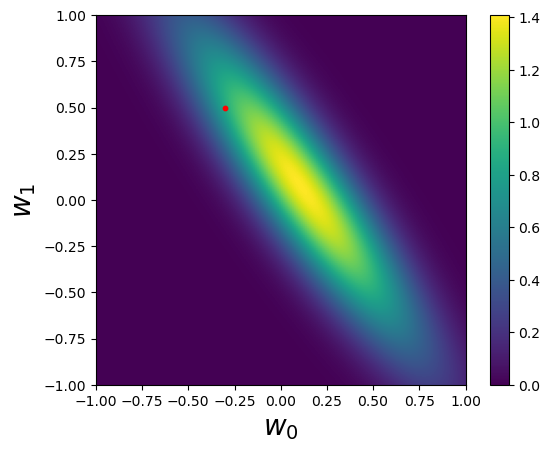

In [16]:
# posterior evaluated on the grid
posterior1 = (1/norm_c[0])*np.multiply(likelihood1,prior)

plt.imshow(posterior1,extent=[-1,1,-1,1],origin="lower")
plt.xlabel('$w_0$', fontsize=20)
plt.ylabel('$w_1$', fontsize=20)

# plotting datapoint
plt.colorbar()
plt.scatter(-0.3,0.5,color='r',s=10)

plt.show()

#### Sampling 6 predictors h(x,w) by drawing from the posterior at step 1

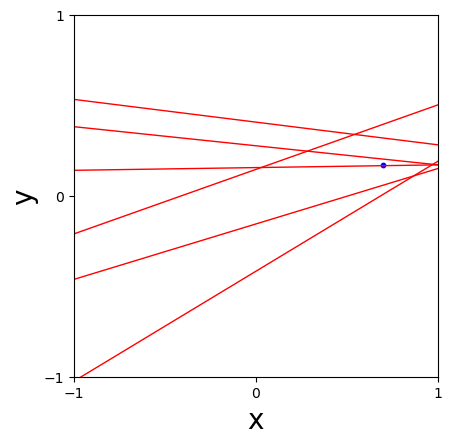

In [17]:
# m: number of lines sampled
m=6

# to sample from posterior1 we use the distribution over the grid
aux1=np.arange(len(xxyy))
aux2=(1/np.sum(posterior1))*posterior1.flatten()

# returns the index of the flattened grid with the flattened distribution over pairs
aux3=np.random.choice(aux1, size=m, replace=True, p=aux2)
w_sample=xxyy[aux3]

x_coord = np.linspace(-1, 1, N)

# plot
fig, ax = plt.subplots()
fig.set_size_inches(4.7, 4.7, forward=True)

ax.set(xlim=(-1, 1), xticks=np.arange(-1, 1.1,1),
       ylim=(-1, 1), yticks=np.arange(-1, 1.1,1))

ax.set_xlabel('x',fontsize=20)  # Add an x-label to the axes.
ax.set_ylabel('y',fontsize=20)  # Add a y-label to the axes.
x_coord = np.linspace(-1, 1, 200)

for j in range(m):
    
    y_coord = h(x_coord,w_sample[j][0],w_sample[j][1])
    ax.plot(x_coord, y_coord, linewidth=1.0, color="red",label="f: Underlying function")
    
# plotting datapoint
plt.scatter(x_data[0],t_data[0],color='b',s=10)    

plt.show()

## Step 2: 2 datapoints received

In [18]:
datapoint_index=1

#### Likelihood Plot

Datapoint 2 : ( -0.642208150158003 , -0.8207444906780299 )


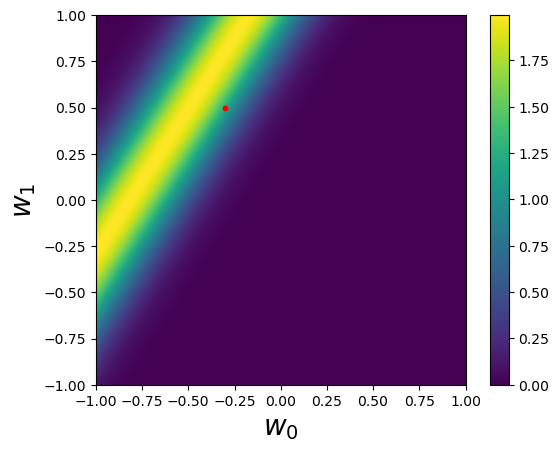

In [19]:
zz=np.zeros(len(xxyy))

for i in range(len(xxyy)):
    zz[i]=likelihood_function(xxyy[i,0],xxyy[i,1])
    
likelihood2 = zz.reshape((xres,yres))

print("Datapoint",datapoint_index+1,": (",x_data[datapoint_index],",",t_data[datapoint_index],")")
    
plt.imshow(likelihood2,extent=[-1,1,-1,1],origin="lower")
plt.colorbar()
plt.xlabel('$w_0$', fontsize=20)
plt.ylabel('$w_1$', fontsize=20)

# plotting datapoint
plt.scatter(-0.3,0.5,color='r',s=10)

plt.show()

#### Normalization constant

In [20]:
prior2=posterior_step1

In [21]:
def prod_step2(w0,w1):
    return likelihood_function(w0,w1) * prior2(w0,w1)

In [22]:
norm_c=integrate.nquad(prod_step2, [[-3, 3],[-3, 3]])

print("Normalization constant:",norm_c[0])

Normalization constant: 0.415259042216346


#### Posterior

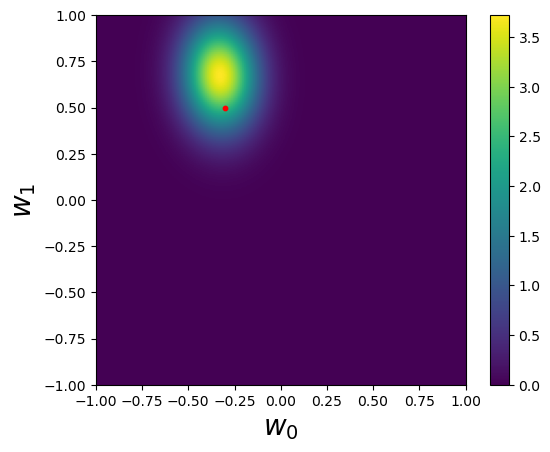

In [23]:
posterior2 = (1/norm_c[0])*np.multiply(likelihood2,posterior1)

plt.imshow(posterior2,extent=[-1,1,-1,1],origin="lower")
plt.colorbar()
plt.xlabel('$w_0$', fontsize=20)
plt.ylabel('$w_1$', fontsize=20)

# plotting datapoint
plt.scatter(-0.3,0.5,color='r',s=10)

plt.show()

#### Sampling 6 predictors h(x,w) by drawing from the posterior at step 2

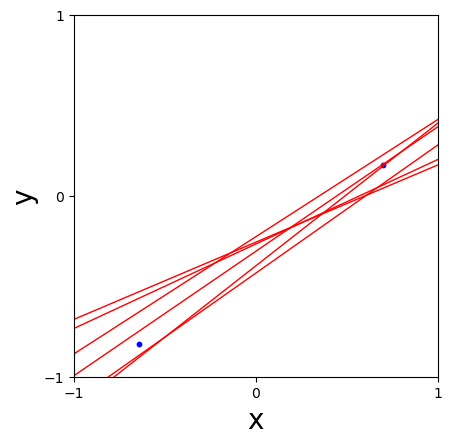

In [24]:
# m: number of lines sampled
m=6

# to sample from posterior1 we use the distribution over the grid
aux1=np.arange(len(xxyy))
aux2=(1/np.sum(posterior2))*posterior2.flatten()

# returns the index of the flattened grid with the flattened distribution over pairs
aux3=np.random.choice(aux1, size=m, replace=True, p=aux2)
w_sample=xxyy[aux3]

x_coord = np.linspace(-1, 1, N)

# plot
fig, ax = plt.subplots()
fig.set_size_inches(4.7, 4.7, forward=True)

ax.set(xlim=(-1, 1), xticks=np.arange(-1, 1.1,1),
       ylim=(-1, 1), yticks=np.arange(-1, 1.1,1))

ax.set_xlabel('x',fontsize=20)  # Add an x-label to the axes.
ax.set_ylabel('y',fontsize=20)  # Add a y-label to the axes.
x_coord = np.linspace(-1, 1, 200)

for j in range(m):
    
    y_coord = h(x_coord,w_sample[j][0],w_sample[j][1])
    ax.plot(x_coord, y_coord, linewidth=1.0, color="red",label="f: Underlying function")
    
# plotting datapoint
plt.scatter(x_data[0],t_data[0],color='b',s=10)    
plt.scatter(x_data[1],t_data[1],color='b',s=10)  

plt.show()

## ...

## For all datapoints

In [25]:
# redefining functions for readability

In [26]:
# data grid
xlim = (-1, 1)
ylim = (-1, 1)
xres = 200
yres = 200
x = np.linspace(xlim[0], xlim[1], xres)
y = np.linspace(ylim[0], ylim[1], yres)
xx, yy = np.meshgrid(x,y)
xxyy = np.c_[xx.ravel(), yy.ravel()]

In [27]:
prior=multivariate_normal(mean=mu, cov=Sigma).pdf

In [28]:
def likelihood_function(w0,w1):
    constant=(np.sqrt(beta)/np.sqrt(2*np.pi))
    l=1  
    l*=constant*np.exp(-(beta/2)*(t_data[datapoint_index]-h(x_data[datapoint_index],w0,w1))**2)  
    return l

In [29]:
# likelihood on data grid
aux=np.zeros(len(xxyy))
for i in range(len(xxyy)):
    aux[i]=likelihood_function(xxyy[i,0],xxyy[i,1])
    
likelihood_data = aux.reshape((xres,yres))

# prior on data grid
aux=np.zeros(len(xxyy))
aux = prior(xxyy)
prior_data= aux.reshape((xres,yres))

for n in range(N):
    
    if (n>=1):
        aux=np.zeros(len(xxyy))
        for i in range(len(xxyy)):
            aux[i]=likelihood_function(xxyy[i,0],xxyy[i,1])
    
        likelihood_data = aux.reshape((xres,yres))
    
    datapoint_index=n

    #def new_posterior(w0,w1):
    #     return prior([w0,w1])*likelihood_function(w0,w1)
        
    #norm_c=integrate.nquad(new_posterior, [[-3, 3],[-3, 3]])
    
    #posterior_data = (1/norm_c[0])*np.multiply(likelihood_data,prior_data)
    
    posterior_data = np.multiply(likelihood_data,prior_data)
    
    prior_data=posterior_data

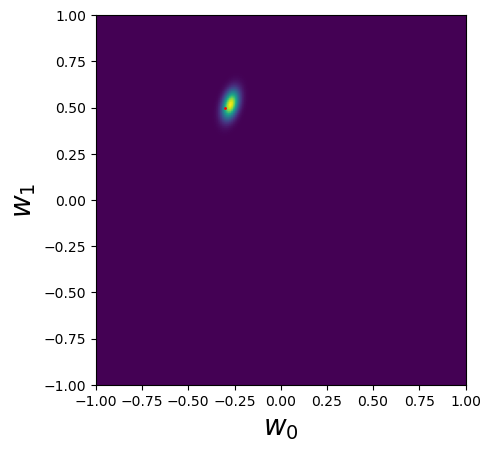

In [30]:
plt.imshow(posterior_data,extent=[-1,1,-1,1],origin="lower")

plt.xlabel('$w_0$', fontsize=20)
plt.ylabel('$w_1$', fontsize=20)

# plotting datapoint
plt.scatter(-0.3,0.5,color='r',s=1)

plt.show()

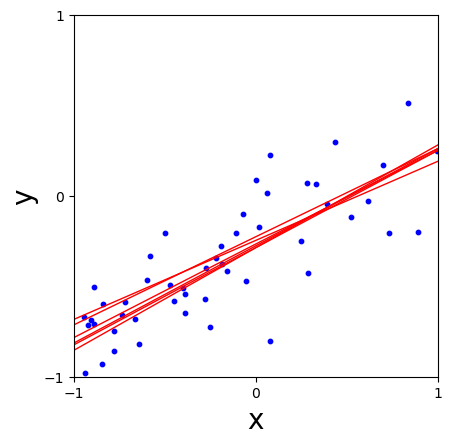

In [31]:
# m: number of lines sampled
m=6

# to sample from posterior1 we use the distribution over the grid
aux1=np.arange(len(xxyy))
aux2=(1/np.sum(posterior_data))*posterior_data.flatten()

# returns the index of the flattened grid with the flattened distribution over pairs
aux3=np.random.choice(aux1, size=m, replace=True, p=aux2)
w_sample=xxyy[aux3]

x_coord = np.linspace(-1, 1, N)

# plot
fig, ax = plt.subplots()
fig.set_size_inches(4.7, 4.7, forward=True)

ax.set(xlim=(-1, 1), xticks=np.arange(-1, 1.1,1),
       ylim=(-1, 1), yticks=np.arange(-1, 1.1,1))

ax.set_xlabel('x',fontsize=20)  # Add an x-label to the axes.
ax.set_ylabel('y',fontsize=20)  # Add a y-label to the axes.
x_coord = np.linspace(-1, 1, 200)

for j in range(m):
    
    y_coord = h(x_coord,w_sample[j][0],w_sample[j][1])
    ax.plot(x_coord, y_coord, linewidth=1.0, color="red",label="f: Underlying function")
    
# plotting datapoint
for i in range(N):
    plt.scatter(x_data[i],t_data[i],color='b',s=10)     

plt.show()